# Dow Component Performance

Display the trailing `n` day performance of the components of the Dow index.

## Preliminaries

Import packages. Use `pandas_datareader.data` for accessing prices.

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from datetime import timedelta, date
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import FuncFormatter

pd.options.display.float_format = '{:+.4f}'.format

set up array of Dow components.

In [2]:
components= ["MMM", "AXP", "AAPL", "BA", "CAT", "CVX", "CSCO", "KO",
             "DWDP", "XOM", "GE", "GS", "HD", "IBM", "INTC", "JNJ",
             "JPM", "MCD", "MRK", "MSFT", "NKE", "PFE", "PG", "TRV",
             "UNH", "UTX", "VZ", "V", "WMT", "DIS"]

set up the date range for the plot.

In [3]:
today = date.today()
start = today - timedelta(days=100)

## Download prices

Using `quandl` get a dataframe with the `n` days for price history.
Keep the `AdjClose` for calculating the daily returns.

In [4]:
def collect(components):
    ss = {}
    for ticker in components:
        s = web.DataReader('WIKI/' + ticker, 'quandl', start=start)['AdjClose']
        s = s.rename(ticker)
        ss[ticker] = s
    return pd.DataFrame(ss)

In [5]:
data = collect(components)

data.head()

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DWDP,GE,GS,...,NKE,PFE,PG,TRV,UNH,UTX,V,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2017-11-15,+169.0800,+93.2600,+262.8600,+134.1000,+34.1100,+116.4500,+103.6900,+68.9700,+18.2600,+237.6100,...,+56.6300,+35.3600,+88.2300,+133.7100,+209.8600,+117.5700,+110.2500,+44.1100,+89.8300,+81.2100
2017-11-16,+171.1000,+93.5600,+263.7000,+136.3600,+35.8800,+114.5700,+103.6000,+70.6800,+18.2500,+239.3700,...,+57.2300,+35.5600,+89.2500,+130.8100,+211.1300,+117.8900,+111.0200,+44.7700,+99.6200,+80.5600
2017-11-17,+170.1500,+93.6900,+262.2600,+136.1300,+35.9000,+114.7100,+103.4400,+70.7400,+18.2100,+238.0200,...,+59.1900,+35.3700,+88.4300,+129.9200,+209.9000,+116.5300,+109.8200,+45.4200,+97.4700,+80.2400
2017-11-20,+169.9800,+93.9500,+264.6300,+136.9100,+36.5000,+114.7200,+102.7500,+70.8500,+17.9800,+238.1300,...,+59.2500,+35.3500,+88.2700,+129.7700,+210.2500,+116.3800,+109.9500,+46.2000,+97.4800,+80.5500
2017-11-21,+173.1400,+94.4100,+266.9900,+137.6000,+36.6500,+115.1700,+103.0000,+71.2600,+17.8300,+238.0200,...,+59.3900,+35.5400,+88.7200,+130.6300,+212.6000,+117.0400,+111.4500,+46.1800,+96.5200,+80.8700


## Calculate daily cumulative returns

Ignoring holidays, first calculate the daily percent return; add 1 to get the return ratio.
Take the `log` of the ratios.

In [6]:
returns = data.dropna(how='all').sort_index().pct_change()[1:].add(1)
returns = returns.applymap(np.log)

returns.tail()

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DWDP,GE,GS,...,NKE,PFE,PG,TRV,UNH,UTX,V,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-15,+0.0330,+0.0034,+0.0331,+0.0121,+0.0462,-0.0097,+0.0055,+0.0073,-0.0034,+0.0192,...,+0.0048,+0.0147,+0.0212,+0.0020,-0.0121,+0.0257,+0.0119,+0.0046,+0.0149,-0.0033
2018-02-16,-0.0032,+0.0024,-0.0040,-0.0233,+0.0057,-0.0035,+0.0128,+0.0014,+0.0134,-0.0002,...,+0.0001,+0.0153,+0.0023,+0.0020,+0.0147,-0.0057,-0.0035,+0.0082,+0.0149,+0.0043
2018-02-20,-0.0034,+0.0041,-0.0048,-0.0047,-0.0061,-0.0104,-0.0052,-0.0046,-0.0208,-0.0103,...,-0.0119,-0.0069,-0.0154,-0.0149,-0.0119,-0.0219,+0.0013,-0.0248,-0.1074,-0.0104
2018-02-21,-0.0045,+0.0032,-0.0028,-0.0021,-0.0172,-0.0175,-0.0088,-0.0093,-0.0171,-0.0056,...,-0.0065,-0.0070,-0.0136,-0.0038,-0.0068,+0.0219,-0.0130,-0.0198,-0.0279,-0.0114
2018-02-22,+0.0089,-0.0015,+0.0100,+0.0231,-0.0086,+0.0076,+0.0018,+0.0136,+0.0089,-0.0075,...,+0.0012,-0.0006,+0.0074,-0.0065,+0.0087,+0.0329,-0.0004,-0.0019,+0.0136,+0.0129


Now calculate each day's cumulative sum

In [7]:
cumret = returns.fillna(0).cumsum()

cumret.tail()

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DWDP,GE,GS,...,NKE,PFE,PG,TRV,UNH,UTX,V,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-15,+0.0229,+0.0348,+0.3046,+0.1765,+0.2564,-0.0342,+0.0143,+0.0409,-0.2067,+0.1192,...,+0.1872,+0.0098,-0.0682,+0.0522,+0.0742,+0.1005,+0.1036,+0.1201,+0.1390,-0.0635
2018-02-16,+0.0196,+0.0372,+0.3006,+0.1531,+0.2621,-0.0377,+0.0270,+0.0423,-0.1933,+0.1189,...,+0.1874,+0.0251,-0.0659,+0.0542,+0.0889,+0.0948,+0.1000,+0.1283,+0.1539,-0.0592
2018-02-20,+0.0163,+0.0413,+0.2958,+0.1484,+0.2560,-0.0481,+0.0218,+0.0377,-0.2141,+0.1087,...,+0.1754,+0.0182,-0.0813,+0.0393,+0.0770,+0.0729,+0.1014,+0.1035,+0.0465,-0.0696
2018-02-21,+0.0117,+0.0445,+0.2931,+0.1463,+0.2388,-0.0656,+0.0130,+0.0284,-0.2313,+0.1030,...,+0.1689,+0.0112,-0.0949,+0.0355,+0.0702,+0.0948,+0.0883,+0.0837,+0.0186,-0.0810
2018-02-22,+0.0206,+0.0429,+0.3031,+0.1694,+0.2302,-0.0580,+0.0148,+0.0420,-0.2223,+0.0955,...,+0.1701,+0.0107,-0.0875,+0.0290,+0.0789,+0.1277,+0.0879,+0.0818,+0.0322,-0.0681


Convert the cumulative results into return ratios.

In [8]:
cumret = cumret.applymap(np.exp)

cumret.tail()

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DWDP,GE,GS,...,NKE,PFE,PG,TRV,UNH,UTX,V,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-15,+1.0231,+1.0354,+1.3561,+1.1930,+1.2923,+0.9663,+1.0144,+1.0418,+0.8133,+1.1266,...,+1.2059,+1.0099,+0.9340,+1.0536,+1.0770,+1.1057,+1.1091,+1.1276,+1.1492,+0.9384
2018-02-16,+1.0198,+1.0379,+1.3507,+1.1655,+1.2996,+0.9630,+1.0274,+1.0432,+0.8242,+1.1263,...,+1.2061,+1.0255,+0.9362,+1.0557,+1.0930,+1.0994,+1.1052,+1.1369,+1.1664,+0.9425
2018-02-20,+1.0164,+1.0421,+1.3443,+1.1600,+1.2917,+0.9530,+1.0221,+1.0384,+0.8072,+1.1148,...,+1.1918,+1.0184,+0.9219,+1.0401,+1.0801,+1.0756,+1.1067,+1.1090,+1.0476,+0.9328
2018-02-21,+1.0118,+1.0455,+1.3405,+1.1576,+1.2697,+0.9365,+1.0131,+1.0289,+0.7935,+1.1085,...,+1.1840,+1.0113,+0.9094,+1.0361,+1.0728,+1.0994,+1.0923,+1.0873,+1.0188,+0.9222
2018-02-22,+1.0208,+1.0439,+1.3540,+1.1846,+1.2589,+0.9437,+1.0149,+1.0429,+0.8007,+1.1002,...,+1.1854,+1.0107,+0.9162,+1.0294,+1.0821,+1.1362,+1.0919,+1.0852,+1.0327,+0.9341


Normalized these results so the latest cumulative return ratio is 1.
Then subtract 1 to get cumulative returns.

In [9]:
cumret = (cumret / cumret.tail(1).values[0,:]).add(-1)

cumret.tail()

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DWDP,GE,GS,...,NKE,PFE,PG,TRV,UNH,UTX,V,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-15,+0.0023,-0.0081,+0.0015,+0.0071,+0.0265,+0.0240,-0.0006,-0.0011,+0.0157,+0.0239,...,+0.0173,-0.0008,+0.0194,+0.0235,-0.0047,-0.0268,+0.0158,+0.0391,+0.1128,+0.0046
2018-02-16,-0.0010,-0.0058,-0.0025,-0.0162,+0.0324,+0.0205,+0.0123,+0.0003,+0.0294,+0.0237,...,+0.0174,+0.0145,+0.0218,+0.0256,+0.0100,-0.0323,+0.0122,+0.0476,+0.1295,+0.0090
2018-02-20,-0.0043,-0.0016,-0.0072,-0.0208,+0.0261,+0.0099,+0.0070,-0.0043,+0.0082,+0.0132,...,+0.0054,+0.0076,+0.0062,+0.0104,-0.0019,-0.0533,+0.0135,+0.0219,+0.0144,-0.0015
2018-02-21,-0.0089,+0.0015,-0.0100,-0.0229,+0.0086,-0.0076,-0.0018,-0.0135,-0.0089,+0.0075,...,-0.0012,+0.0006,-0.0074,+0.0065,-0.0086,-0.0323,+0.0004,+0.0019,-0.0135,-0.0128
2018-02-22,+0.0000,+0.0000,+0.0000,+0.0000,+0.0000,+0.0000,+0.0000,+0.0000,+0.0000,+0.0000,...,+0.0000,+0.0000,+0.0000,+0.0000,+0.0000,+0.0000,+0.0000,+0.0000,+0.0000,+0.0000


## Plot returns

Plot returns with a label on each line as well as an off-chart legend.
`tickers` is the list of tickers to be plotted.
`cmap` is the colormap used to pick the colors of the lines.
Colormaps are indexed from 0 to 1.
`y0` is the first row in the dataframe - the initial values.
`x0` is the first row time index.

For each ticker: `ticker` is the cumulative returns and `l` is the ticker label.
Set `use_index=True` in `plot()` to use the index as the x axis.
Use `text()` to label each line along the y axis.

Tickers are sorted by performance over the whole period: green for better performance and red for lower performance.

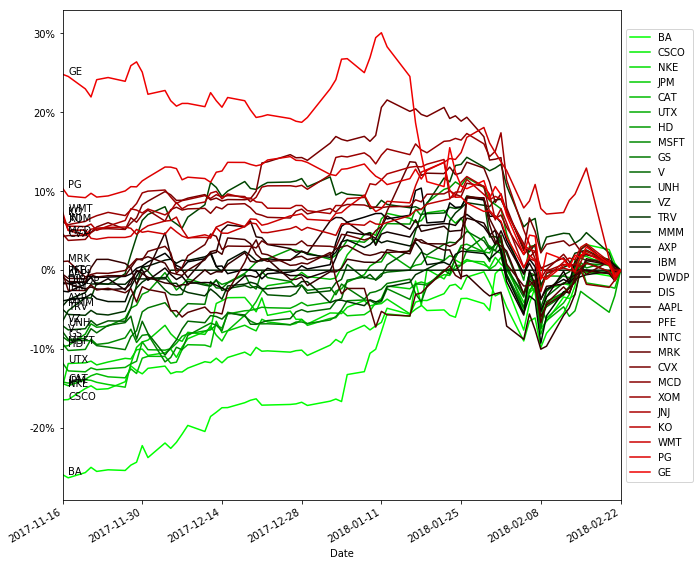

In [10]:
def plotcumret(cumret=cumret):
    tickers = len(cumret.columns.values)

    fig, ax = plt.subplots(figsize=(10, 10))
    cmap = LinearSegmentedColormap('red-green', {
        'red':   ((0.0, 0.0, 0.0),
                  (0.5, 0.0, 0.0),
                  (1.0, 1.0, 1.0)),
        'blue':  ((0.0, 0.0, 0.0),
                  (1.0, 0.0, 0.0)),
        'green': ((0.0, 0.0, 1.0),
                  (0.5, 0.0, 0.0),
                  (1.0, 0.0, 0.0))
    })
    y0 = cumret.head(1).values[0]
    x0 = cumret.index[1]
    i = 0
    for idx in sorted(range(len(y0)), key=lambda k: y0[k]):
        ticker = cumret.columns.values[idx]
        l = cumret.columns[idx]
        ax = cumret.plot(ax=ax, kind='line', y=ticker, c=cmap(i/tickers), label=l, use_index=True)
        ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
        if y0[idx] == y0[idx]:
            plt.text(x0, y0[idx], l)
        i = i + 1
        

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    plt.close('all')
plotcumret()